In [1]:
# Packages needed, may not be in git yet
%reload_ext autoreload
%autoreload 2

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import scipy.constants as sc
%matplotlib inline
from eos import *
from astro_const import *
from structure import *
from reactions import *
from scipy.optimize import brentq
from astro_const import *
from zams import *
sns.set_style("whitegrid")

In [2]:
delta_m = 1e-80
eta = 9e-20
xi = 5e-2

Z = [1,2,7]
A = [1,4,14]
X = [.706,.275,.019]
comp = [Z,A,X]
mu = mean_molecular_weight(Z,A,X)
Pc, rhoc, Tc = central_thermal(0.1,0.1,mu) # Mass and radius are in units of solar
m, radius, pressure, Luminosity = integrate(0.1, 0.1, delta_m, eta, xi, comp, max_steps=10000, pp_factor=1.0) # Pc,rhoc,Tc,delta_m,eta,xi,mu,XH

print(m[-1],radius[-1],pressure[-1],Luminosity[-1])

1.9883352665072425e+29 69571843.14969318 0.00797837769043102 1.6955174148164621e+25


In [3]:
delta_m = 5e-61
eta = 1e-11
xi = 5e-2

m, radius, pressure, Luminosity = integrate(0.1, 0.1, delta_m, eta, xi, comp, max_steps=10000, pp_factor=1.0) # Pc,rhoc,Tc,delta_m,eta,xi,mu,XH

print(m[-1],radius[-1],pressure[-1],Luminosity[-1])
print(radius/Rsun)

1.988335275005056e+29 69568064.08874863 898523.9292784276 1.6955174230785984e+25
[9.41559408e-22 9.86461995e-22 1.03350597e-21 ... 9.99969897e-02
 9.99971047e-02 9.99972173e-02]


In [4]:
def g(R,M,comp,delta_m,eta,xi):
    m,r,p,l = integrate(M,R,delta_m,eta,xi,comp,max_steps=10000,pp_factor=1.0)
    L = l[-1]
    R_new = r[-1]
    T_eff = Teff(M)
    Lwant = surface_luminosity(T_eff,R_new)
    return(Lwant-L)

In [5]:
masses = np.array([0.1,0.15,0.2,0.3])
Teffs = np.array([2800.0,3150.0,3300.0,3400.0])
Radii = np.zeros(len(masses))
Z = [1,2,7]
A = [1,4,14]
X = [.706,.275,.019]
comp = [Z,A,X]

for i in range(len(masses)):
    R = brentq(g,0.000001,1,args = (masses[i],comp,delta_m,eta,xi))
    Radii[i] = R
    
Radii

array([0.0615696 , 0.07715441, 0.09173061, 0.1185253 ])

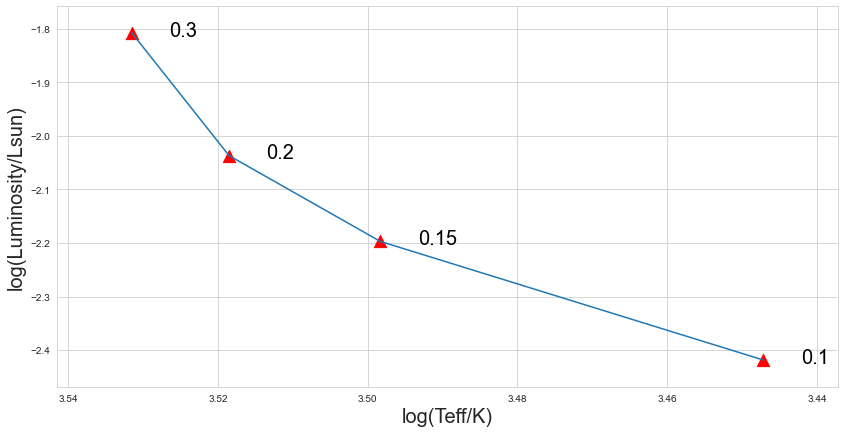

In [6]:
Ts = np.log10(Teff(masses))
Ls = np.log10(surface_luminosity(Ts,Radii))
T_eff = Teff(masses)

plt.figure(figsize=(14,7))
plt.plot(Ts,Ls)
plt.xlim(Ts[-1]+0.01,Ts[0]-0.01)
plt.ylim(Ls[0] - 0.05,Ls[-1]+0.05)
plt.text(Ts[0]-0.005,Ls[0]-0.005,'0.1',size = 20,color='black')
plt.text(Ts[1]-0.005,Ls[1]-0.005,'0.15',size = 20,color='black')
plt.text(Ts[2]-0.005,Ls[2]-0.005,'0.2',size = 20,color='black')
plt.text(Ts[3]-0.005,Ls[3]-0.005,'0.3',size = 20,color='black')
plt.scatter(Ts,Ls,s=150,color = 'red',marker = "^")
plt.xlabel('log(Teff/K)',size = 20)
plt.ylabel('log(Luminosity/Lsun)',size = 20)
plt.show()

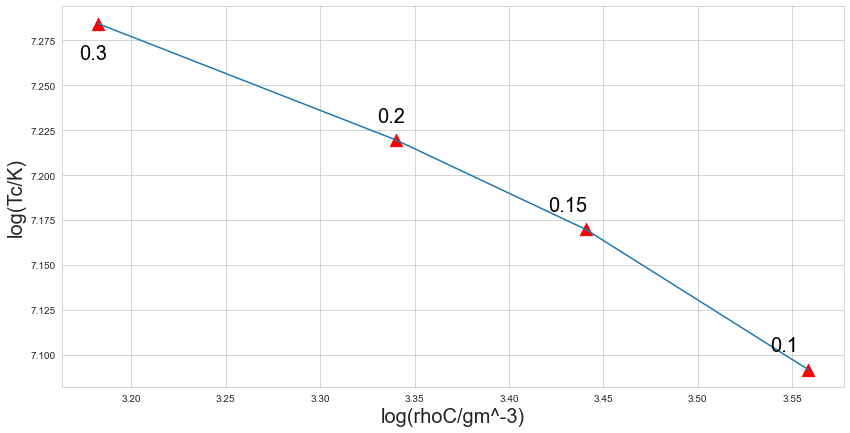

In [7]:
M, z, Pc, rhoc, Tc = central_values(masses,Radii,delta_m,mu, pp_factor=1.0)

rhoc = np.log10(1000*rhoc/(100**3)) # Changing units to g/cm^3
Tc = np.log10(Tc) 

plt.figure(figsize=(14,7))
plt.plot(rhoc,Tc)
plt.scatter(rhoc,Tc,s=150,color = 'red',marker = "^")
plt.text(rhoc[0]-0.02,Tc[0]+0.01,'0.1',size = 20,color='black')
plt.text(rhoc[1]-0.02,Tc[1]+0.01,'0.15',size = 20,color='black')
plt.text(rhoc[2]-0.01,Tc[2]+0.01,'0.2',size = 20,color='black')
plt.text(rhoc[3]-0.01,Tc[3]-0.02,'0.3',size = 20,color='black')
plt.xlabel('log(rhoC/gm^-3)',size = 20)
plt.ylabel('log(Tc/K)',size = 20)
plt.show()

In [8]:
M = 0.3
R = Radii[-1]
m,r,p,l = integrate(M,R,delta_m,eta,xi,comp,max_steps=10000,pp_factor=1.0)
Z = [1,2,7]
A = [1,4,14]
X = [.706,.275,.019]
comp = [Z,A,X]
mu = mean_molecular_weight(Z,A,X)
P_c,rho_c,T_c = central_thermal(M,R,mu)
rho, T = get_rho_and_T(p,P_c,rho_c,T_c)

Text(0, 0.5, 'Temperature [K]')

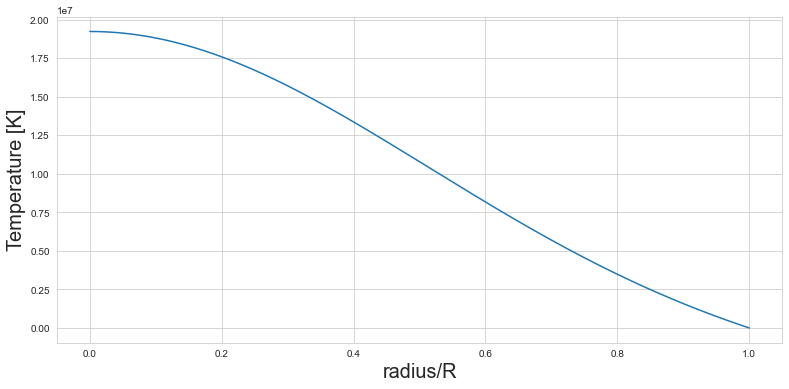

In [9]:
plt.figure(figsize = (13,6))
plt.plot(r/r[-1],T)
plt.xlabel('radius/R',size = 20)
plt.ylabel('Temperature [K]',size = 20)

Text(0, 0.5, 'Temperature [T]')

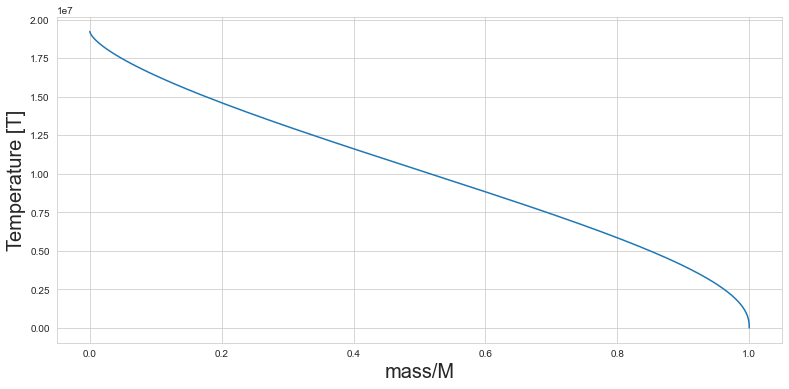

In [10]:
plt.figure(figsize = (13,6))
plt.plot(m/m[-1],T)
plt.xlabel('mass/M',size = 20)
plt.ylabel('Temperature [T]',size = 20)

Text(0, 0.5, 'Luminosity [W]')

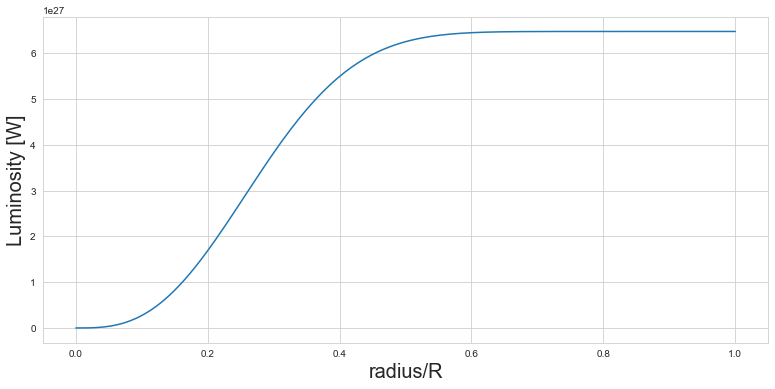

In [11]:
plt.figure(figsize = (13,6))
plt.plot(r/r[-1],l)
plt.xlabel('radius/R',size = 20)
plt.ylabel('Luminosity [W]',size = 20)

Text(0, 0.5, 'Luminsotiy [W]')

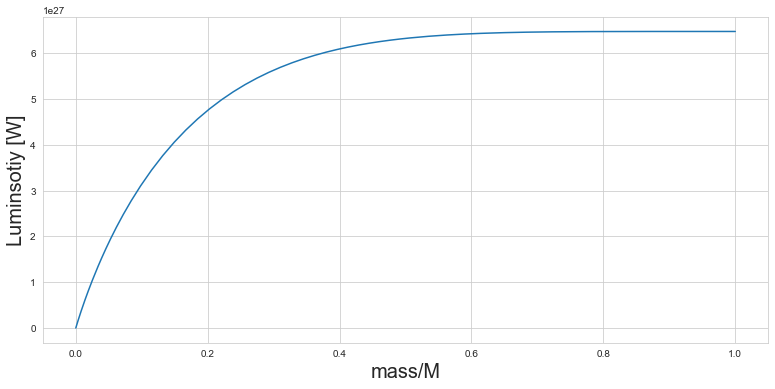

In [12]:
plt.figure(figsize = (13,6))
plt.plot(m/m[-1],l)
plt.xlabel('mass/M',size = 20)
plt.ylabel('Luminsotiy [W]',size = 20)

L(r) reaches ~ 90% of its final value at ~ 4e7 m. At this radius, we have 

In [13]:
i = np.where(r >= 4e7)
print(m[i[0][0]], "kg")

2.6548249526632224e+29 kg


# 3.

Changing the pp_rate to be 10^5 times stronger:

In [14]:
def g(R,M,comp,delta_m,eta,xi,pp_factor = 1):
    m,r,p,l = integrate(M,R,delta_m,eta,xi,comp,max_steps=10000,pp_factor = pp_factor)
    L = l[-1]
    R_new = r[-1]
    T_eff = Teff(M)
    Lwant = surface_luminosity(T_eff,R_new)
    return(Lwant-L)

In [15]:
masses = np.array([0.1,0.15,0.2,0.3])
Teffs = np.array([2800.0,3150.0,3300.0,3400.0])
Radii = np.zeros(len(masses))
Z = [1,2,7]
A = [1,4,14]
X = [.706,.275,.019]
comp = [Z,A,X]
pp_factor = 1e5

for i in range(len(masses)):
    R = brentq(g,0.0001,2,args = (masses[i],comp,delta_m,eta,xi,pp_factor))
    Radii[i] = R
    
Radii

array([0.18328367, 0.23750857, 0.28851225, 0.3834021 ])

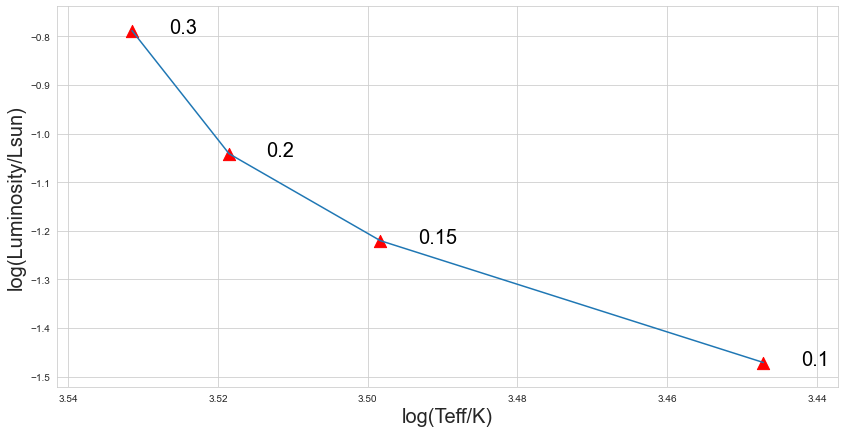

In [16]:
Ts = np.log10(Teff(masses))
Ls = np.log10(surface_luminosity(Ts,Radii))
T_eff = Teff(masses)

plt.figure(figsize=(14,7))
plt.plot(Ts,Ls)
plt.xlim(Ts[-1]+0.01,Ts[0]-0.01)
plt.ylim(Ls[0] - 0.05,Ls[-1]+0.05)
plt.text(Ts[0]-0.005,Ls[0]-0.005,'0.1',size = 20,color='black')
plt.text(Ts[1]-0.005,Ls[1]-0.005,'0.15',size = 20,color='black')
plt.text(Ts[2]-0.005,Ls[2]-0.005,'0.2',size = 20,color='black')
plt.text(Ts[3]-0.005,Ls[3]-0.005,'0.3',size = 20,color='black')
plt.scatter(Ts,Ls,s=150,color = 'red',marker = "^")
plt.xlabel('log(Teff/K)',size = 20)
plt.ylabel('log(Luminosity/Lsun)',size = 20)
plt.show()

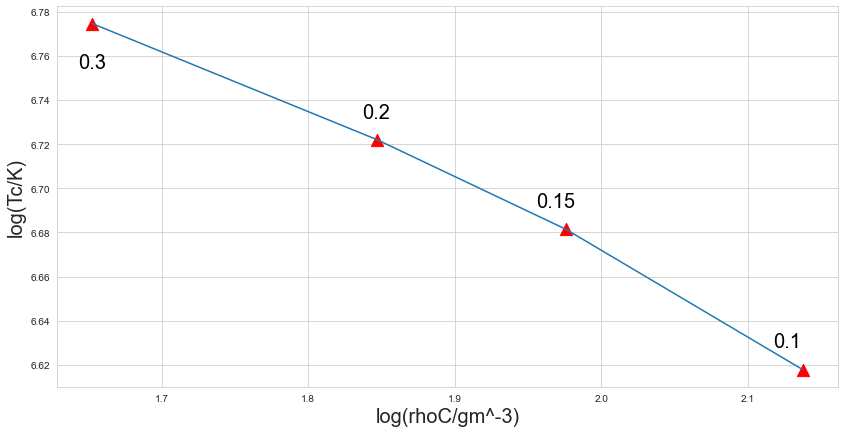

In [17]:
M, z, Pc, rhoc, Tc = central_values(masses,Radii,delta_m,mu, pp_factor=1.0e5)

rhoc = np.log10(1000*rhoc/(100**3)) # Changing units to g/cm^3
Tc = np.log10(Tc) 

plt.figure(figsize=(14,7))
plt.plot(rhoc,Tc)
plt.scatter(rhoc,Tc,s=150,color = 'red',marker = "^")
plt.text(rhoc[0]-0.02,Tc[0]+0.01,'0.1',size = 20,color='black')
plt.text(rhoc[1]-0.02,Tc[1]+0.01,'0.15',size = 20,color='black')
plt.text(rhoc[2]-0.01,Tc[2]+0.01,'0.2',size = 20,color='black')
plt.text(rhoc[3]-0.01,Tc[3]-0.02,'0.3',size = 20,color='black')
plt.xlabel('log(rhoC/gm^-3)',size = 20)
plt.ylabel('log(Tc/K)',size = 20)
plt.show()

In [18]:
delta_m = 1e-4
eta = 1e-11
xi = 0.01

masses = Msun*np.arange(0.1,1.1,0.1)
Pcs = np.zeros(10)

def f(Pc,Mwant,delta_m,eta,xi,mue):
    m,r,p = integrate(Pc,delta_m,eta,xi,mue)
    M = m[-1]
    return(M-Mwant)

for i in range(len(masses)):
    Pguess = pressure_guess(masses[i],mue)
    Pguesses[i] = Pguess
    Pc = bisect(f,Pguess/100,100*Pguess,args = (masses[i],delta_m,eta,xi,mue))
    Pcs[i] = Pc

central_dens = density(Pcs,mue)

NameError: name 'pressure_guess' is not defined

In [ ]:
Radii = np.zeros(10)

for i in range(len(masses)):
    m,r,p = integrate(Pcs[i],delta_m,eta,xi,mue)
    Radii[i] = r[-1]

In [ ]:
R = Radii/Rsun
Pcsnorm = Pcs/(G*(masses**2)*Radii**(-4))
central_dens_norm = central_dens/((3*masses)/(4*np.pi*Radii**(3)))

In [ ]:
for i in range(len(masses)):
    Pguess = pressure_guess(masses[i],mue)
    Pc = bisect(f,0.9*Pguess,1.1*Pguess,args = (masses[i],delta_m,eta,xi,mue))
    Pcs[i] = Pc

central_dens = density(Pcs,mue,K = 2)

Radii = np.zeros(10)

for i in range(len(masses)):
    m,r,p = integrate(Pcs[i],delta_m,eta,xi,mue)
    Radii[i] = r[-1]

In [ ]:
array = np.array([masses/Msun,R,Pcs,Pcsnorm,central_dens,central_dens_norm])
MRdf = pd.DataFrame(array,index = ["$\dfrac{M}{M_{\odot}}$","$\dfrac{R}{R_\odot}$",
                                   "$P_c$","$\dfrac{P_c}{GM^2R^{-4}}$","$\rho_c$",
                                   "$\dfrac{\rho_c}{\dfrac{3M}{4\pi R^3}}$"]).transpose()
MRdf.columns = ["$$\dfrac{M}{M_{\odot}}$$","$$\dfrac{R}{R_\odot}$$",
                                   "$$P_c$$","$$\dfrac{P_c}{GM^2R^{-4}}$$","$$\rho_c$$",
                                   "$$\dfrac{\rho_c}{\dfrac{3M}{4\pi R^3}}$$"]
MRdf

In [ ]:
!python -m pytest

In [ ]:
!python testing.py